#### This makes functions that plots sliceplots for a given list of ions using matplotlib as opposed to yt. It accounts for all ions; even if they are not part of the trident lines.

In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-01-06 23:19:43,622 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-06 23:19:43,623 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-06 23:19:43,624 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-06 23:19:43,624 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-06 23:19:43,625 Parameters: cosmological_simulation   = 0.0


In [17]:
def DIY_plots_xy(ion_list, ion_den, x0, y0, dx, dy,
                 raycolor='white', add_field=False, der_field=False, arrow=True,
                 arrow2=False, x02=None, y02=None, dx2=None, dy2=None,
                 arrow3=False,x03=None, y03=None, dx3=None, dy3=None,
                 arrow4=False,x04=None, y04=None, dx4=None, dy4=None):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(17,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_x = np.arange(513)*(20/512)-10
            ax_y = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_x, ax_y, a[:,:,128].T, cmap = "cet_bmw", norm=colors.LogNorm())
            if arrow==True:
                plt.arrow(x0,y0,dx,dy,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow2==True:
                plt.arrow(x02,y02,dx2,dy2,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow3==True:
                plt.arrow(x03,y03,dx3,dy3,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow4==True:
                plt.arrow(x04,y04,dx4,dy4,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)

            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('x (kpc)', fontsize = 15)
            plt.ylabel('y (kpc)', fontsize = 15)
            plt.show()

In [22]:
def DIY_plots_yz(ion_list, ion_den, x, y0, z0, dy, dz,
                raycolor='white', add_field=False, der_field=False, arrow=True,
                arrow2=False, y02=None, z02=None, dy2=None, dz2=None,
                arrow3=False, y03=None, z03=None, dy3=None, dz3=None,
                arrow4=False, y04=None, z04=None, dy4=None, dz4=None):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(10,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_y = np.arange(257)*(20/512)-5
            ax_z = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_y, ax_z, a[x,:,:].T, cmap = "cet_bmw", norm=colors.LogNorm())
            if arrow==True:
                plt.arrow(y0,z0,dy,dz,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow2==True:
                plt.arrow(y02,z02,dy2,dz2,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow3==True:
                plt.arrow(y03,z03,dy3,dz3,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow4==True:
                plt.arrow(y04,z04,dy4,dz4,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)

            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('y (kpc)', fontsize = 15)
            plt.ylabel('z (kpc)', fontsize = 15)
            plt.show()

In [23]:
def DIY_plots_xz(ion_list, ion_den, y, x0, z0, dx, dz,
                raycolor='white', add_field=False, der_field=False, arrow=True,
                arrow2=False, x02=None, z02=None, dx2=None, dz2=None,
                arrow3=False, x03=None, z03=None, dx3=None, dz3=None,
                arrow4=False, x04=None, z04=None, dx4=None, dz4=None):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(17,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_x = np.arange(513)*(20/512)-10
            ax_z = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_x, ax_z, a[:,y,:].T, cmap = "cet_bmw", norm=colors.LogNorm())
            if arrow==True:
                plt.arrow(x0,z0,dx,dz,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow2==True:
                plt.arrow(x02,z02,dx2,dz2,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow3==True:
                plt.arrow(x03,z03,dx3,dz3,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)
            if arrow4==True:
                plt.arrow(x04,z04,dx4,dz4,color=raycolor, 
                          ec=raycolor, lw=1, head_width=0.14, length_includes_head=True)



            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('x (kpc)', fontsize = 15)
            plt.ylabel('z (kpc)', fontsize = 15)
            plt.show()

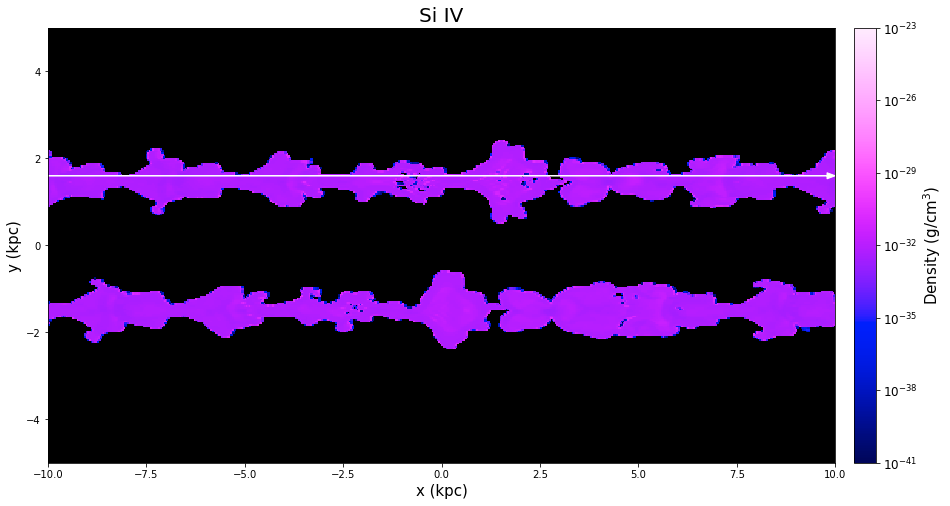

In [19]:
DIY_plots_xy(['Si IV'],['Si_p3_density'] , -10, 1.6, 20, 0, arrow=True)

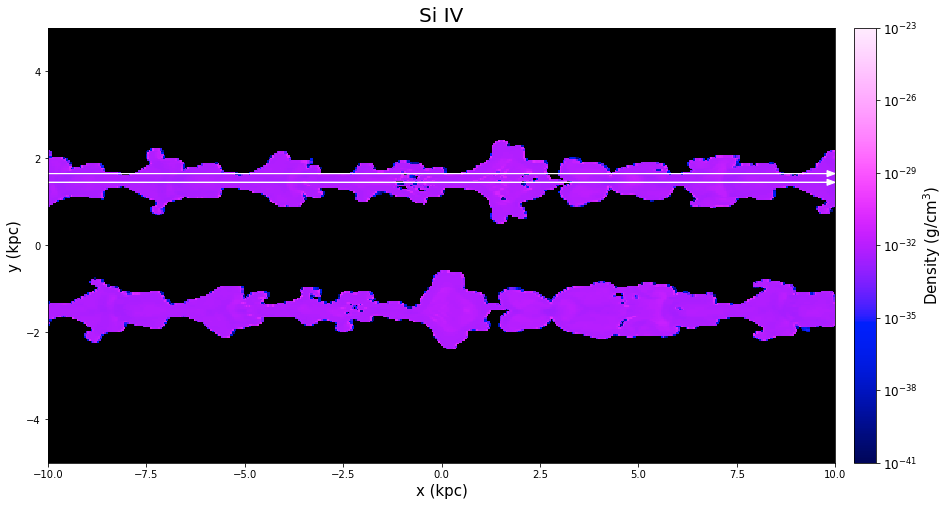

In [18]:
DIY_plots_xy(['Si IV'],['Si_p3_density'] , -10, 1.45, 20, 0, arrow=True, arrow2=True, 
             x02=-10, y02=1.65, dx2=20, dy2=0)

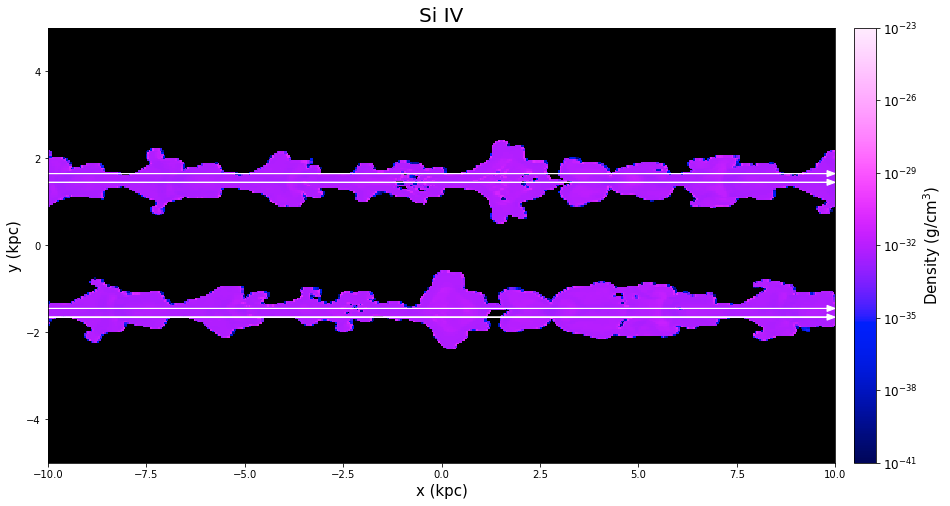

In [21]:
DIY_plots_xy(['Si IV'],['Si_p3_density'] , -10, 1.45, 20, 0, arrow=True, arrow2=True, arrow3=True, arrow4=True,
             x02=-10, y02=1.65, dx2=20, dy2=0,  x03=-10, y03=-1.45, dx3=20, dy3=0,
             x04=-10, y04=-1.65, dx4=20, dy4=0)

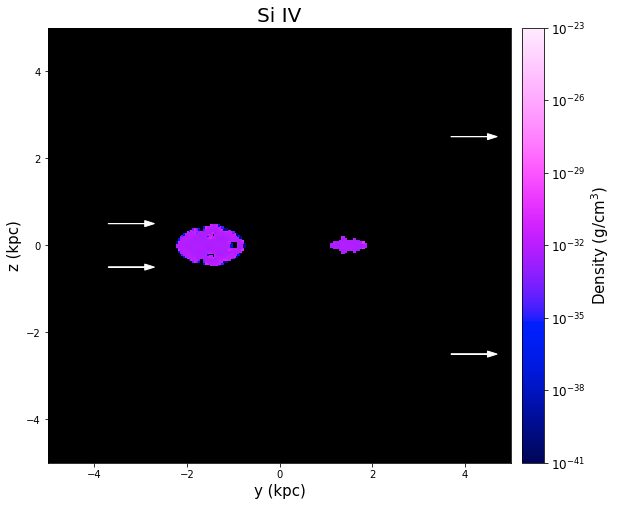

In [25]:
DIY_plots_yz(['Si IV'],['Si_p3_density'],
             30, -3.7, -0.5, 1, 0, arrow=True, arrow2=True, arrow3=True, arrow4=True,
             y02=-3.7, z02=0.5, dy2=1, dz2=0,  y03=3.7, z03=-2.5, dy3=1, dz3=0,
             y04=3.7, z04=2.5, dy4=1, dz4=0)

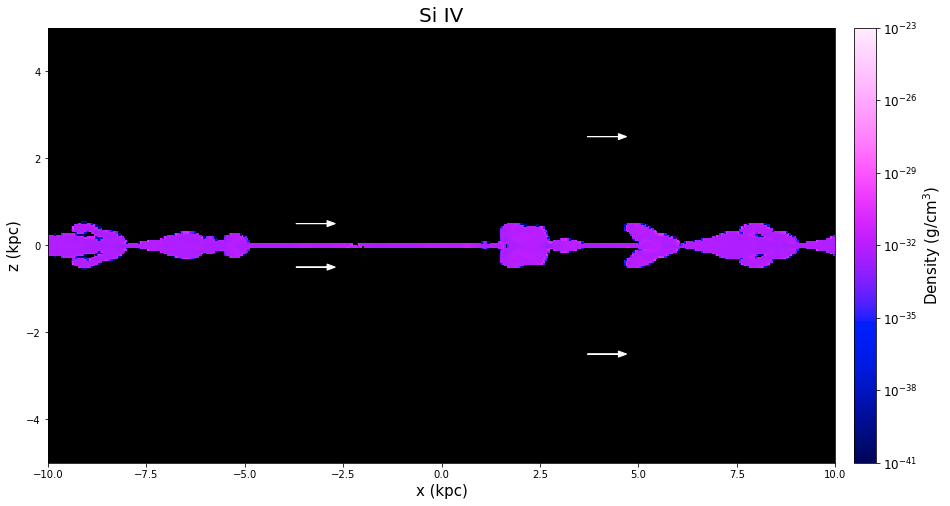

In [26]:
DIY_plots_xz(['Si IV'],['Si_p3_density'],
             90, -3.7, -0.5, 1, 0, arrow=True, arrow2=True, arrow3=True, arrow4=True,
             x02=-3.7, z02=0.5, dx2=1, dz2=0,  x03=3.7, z03=-2.5, dx3=1, dz3=0,
             x04=3.7, z04=2.5, dx4=1, dz4=0)